In [1]:

import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image


In [2]:

## !pip install numpy
## !pip install pandas
## !pip install matplotlib



## Dataset class


In [3]:

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        self.data_df = self.data_df.drop(labels=[0], axis=0)
        self.labels          = []
        self.tensor_imgs     = []
        self.one_hot_classes = []
    
        self.n_samples = 60000
        
    
    def __len__(self):
        return len(self.data_df)
    
  
    
    def convert_data_to_tensors(self):
        
         for index in range(self.n_samples):
             # image target (label)
             label = self.data_df.iloc[index, 0]
             target = torch.zeros((10))
             target[ int(label) ] = 1.0

             # image data, normalised from 0-255 to 0-1
             image_values = torch.FloatTensor(  self.data_df.iloc[index, 1:].values.astype(float)  ) / 255.0
        
             self.labels.append(           label              )
             self.tensor_imgs.append(      image_values       )
             self.one_hot_classes.append(  target             )

                
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        print(img.shape)
        label = str( self.data_df.iloc[index,0] )
        img = img.astype(float)
      
        return img, label
    
    


In [4]:

mnist_dataset = MnistDataset('data/mnist_train.csv')


/var/folders/yw/8h855lk57575rr7jsfhz8vpw0000gn/T/ipykernel_99575/4212739889.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [5]:

my_img, label = mnist_dataset.plot_image(17)


(28, 28)


In [6]:

mnist_dataset.data_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


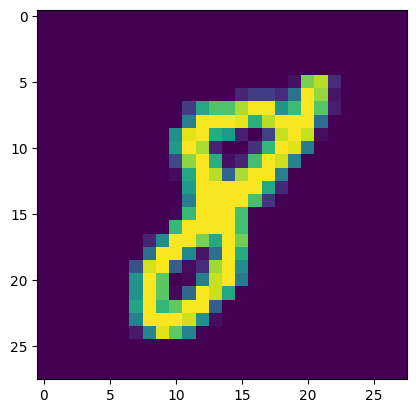

8


In [7]:

plt.imshow(my_img)
plt.show()
print(label)



## Convert data to torch format


In [8]:

mnist_dataset.convert_data_to_tensors()


In [9]:

print( len( mnist_dataset.labels           ))
print( len( mnist_dataset.tensor_imgs      ))
print( len( mnist_dataset.one_hot_classes  ))


60000
60000
60000



## Function to generate uniform random data


In [10]:

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data


def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

# size here must only be an integer
def generate_random_one_hot(size):
    label_tensor = torch.zeros((size))
    random_idx = random.randint(0,size-1)
    label_tensor[random_idx] = 1.0
    return label_tensor
     



## Discriminator


In [11]:

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers    
        self.model = nn.Sequential(
            nn.Linear(784+10, 200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 1),
            nn.Sigmoid()
        )
    
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        


    def forward(self, image_tensor, label_tensor):
        # combine seed and label
        inputs = torch.cat( (image_tensor, label_tensor) )
        return self.model(inputs)   


        
    def train(self, inputs, label_tensor, targets):
        # calculate the output of the network
        outputs = self.forward(inputs, label_tensor)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
   
       


## Test that the discriminator can separate real data from random noise


In [12]:

print( mnist_dataset )


In [13]:

%%time

D = Discriminator()

for i in range(mnist_dataset.n_samples):
    label             = mnist_dataset.labels[i]
    image_data_tensor = mnist_dataset.tensor_imgs[i]
    target_tensor     = mnist_dataset.one_hot_classes[i]
 
    D.train(image_data_tensor, target_tensor, torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random_image(784), generate_random_one_hot(10), torch.FloatTensor([0.0]))
 


counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 57.7 s, sys: 32.6 s, total: 1min 30s
Wall time: 54.7 s


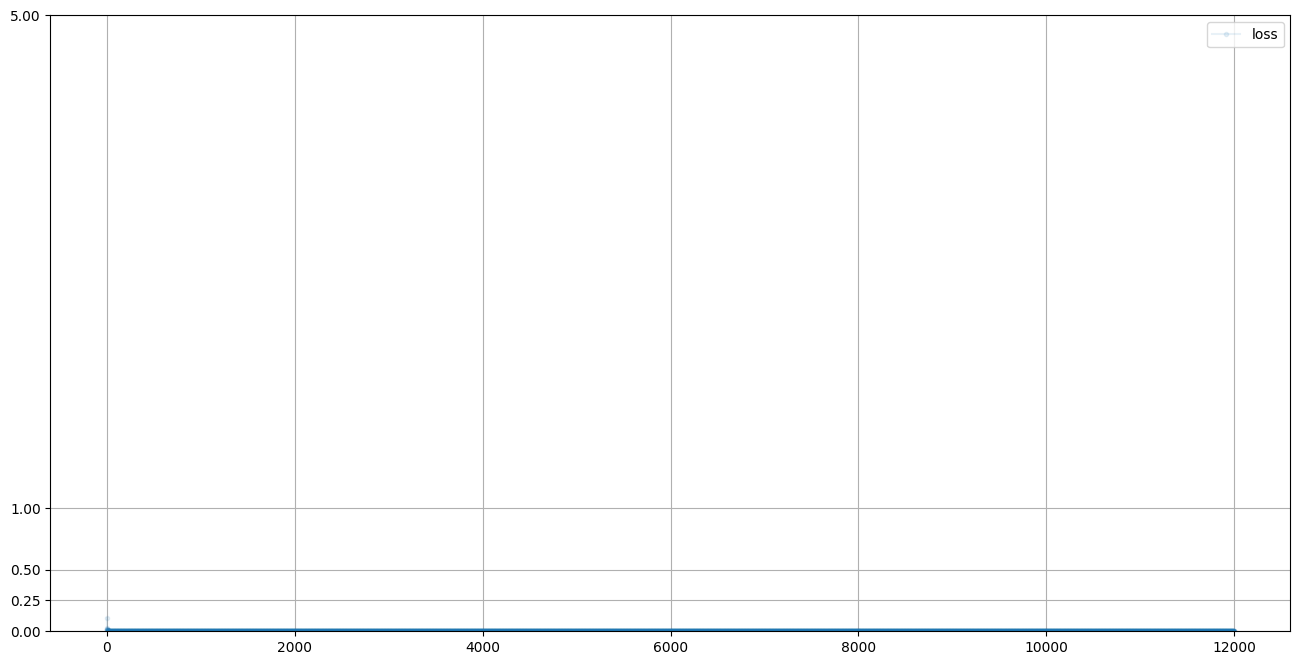

In [14]:

D.plot_progress()



## Manually run discriminator to check it can tell real data from fake


In [15]:

for i in range(4):
    index = random.randint(0,60000) 
    image_data_tensor = mnist_dataset.tensor_imgs [     index   ]
    target_tensor     = mnist_dataset.one_hot_classes[  index   ]

    print( D.forward( image_data_tensor, target_tensor ).item() )



for i in range(4):
    print( D.forward( generate_random_image(784), generate_random_one_hot(10) ).item() )


1.0
1.0
1.0
1.0
8.659134173583105e-12
1.0332362569698272e-11
9.105972920142591e-12
9.120992155997598e-12



## Generator Network


In [16]:

class Generator(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        # define neural network layers
        
        
        self.model = nn.Sequential(
            nn.Linear(100+10, 200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        
 
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # counter and accumulator for progress
        self.counter  = 0;
        self.progress = []
        
     
        
    def forward(self, seed_tensor, label_tensor):        
        # combine seed and label
        inputs = torch.cat( (seed_tensor, label_tensor) )
        return self.model(inputs)

    
    
    def train(self, D, inputs, label_tensor, targets):
        # calculate the output of the network
        g_output = self.forward(inputs, label_tensor)
        
        # pass onto Discriminator
        d_output = D.forward(g_output, label_tensor)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

  
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
    
    def plot_images(self, label):
        label_tensor = torch.zeros((10))
        label_tensor[label] = 1.0
        # plot a 3 column, 2 row array of sample images
        f, axarr = plt.subplots(2,3, figsize=(16,8))
        for i in range(2):
            for j in range(3):
                axarr[i,j].imshow(
                            G.forward(generate_random_seed(100), 
                            label_tensor
                        ).detach().cpu().numpy().reshape(28,28), interpolation='none', cmap='Blues')
        




## Check the generator output is of the right type and shape


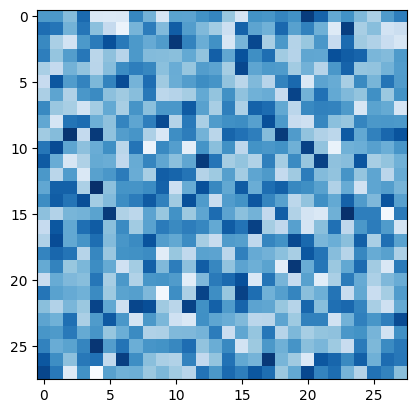

In [17]:

G = Generator()

output = G.forward(generate_random_seed(100), generate_random_one_hot(10))

img = output.detach().numpy().reshape(28,28)

plt.imshow(img, interpolation='none', cmap='Blues')




## Train GAN

* create Discriminator and Generator

* train Discriminator and Generator


In [18]:

D = Discriminator()
G = Generator()


In [19]:

%%time 

epochs = 12

for epoch in range(epochs):
  print ("epoch = ", epoch + 1)

  for i in range(mnist_dataset.n_samples):
    
    label             = mnist_dataset.labels[i]
    image_data_tensor = mnist_dataset.tensor_imgs[i]
    target_tensor     = mnist_dataset.one_hot_classes[i]
    
        
    # train discriminator on true
    D.train(image_data_tensor, target_tensor, torch.FloatTensor([1.0]) )
    
    # random 1-hot label for generator
    random_label = generate_random_one_hot(10)
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated

    D.train( G.forward(  
                           generate_random_seed(100), 
                           random_label
                      ).detach(),                 # use detach() so gradients in G are not calculated
             random_label, 
             torch.FloatTensor( [0.0] )
           )
    
    random_label = generate_random_one_hot(10)
    
    G.train(D, generate_random_seed(100), random_label, torch.FloatTensor([1.0]))



epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  2
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
epoch =  3
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
epoch =  4
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
epoch =  5
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000



## Plot discriminator error

for the discriminator, we want the loss values to be around 0.25 for a balanced discriminator and generator, there the discriminator is not confident at telling real images from generated images. if the loss values fall towards zero, it suggests the generator has not learned to fool the discriminator.


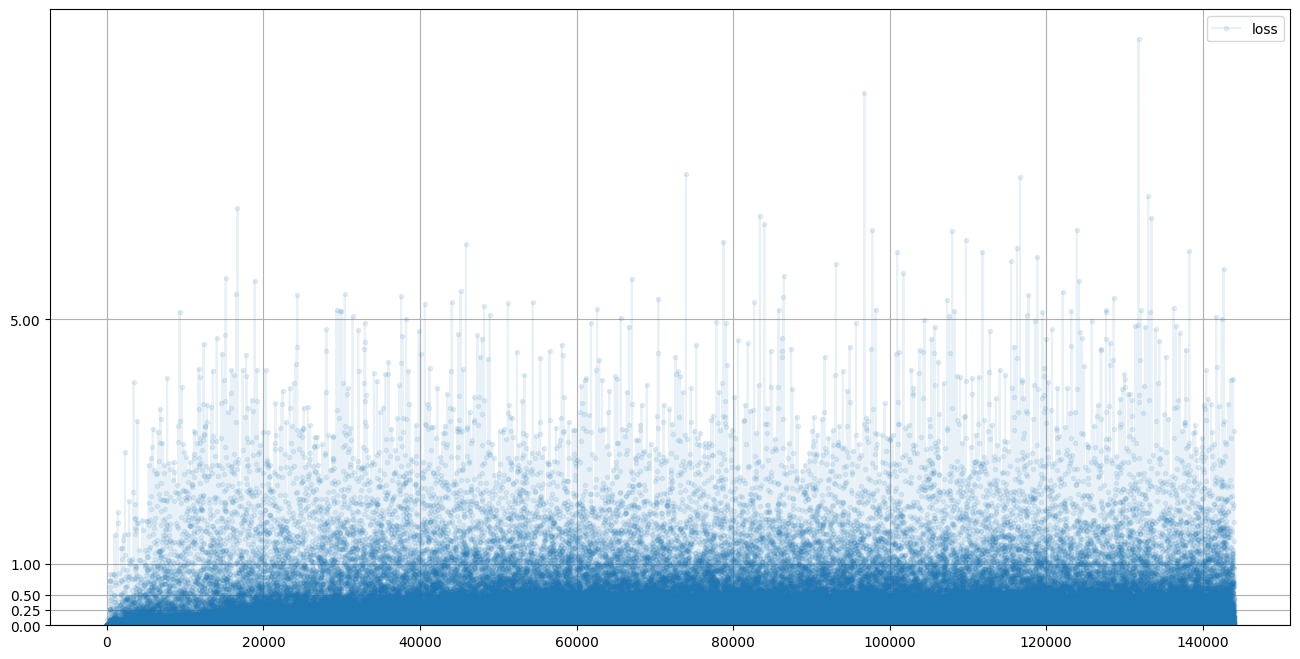

In [20]:

D.plot_progress()



## Plot generator error


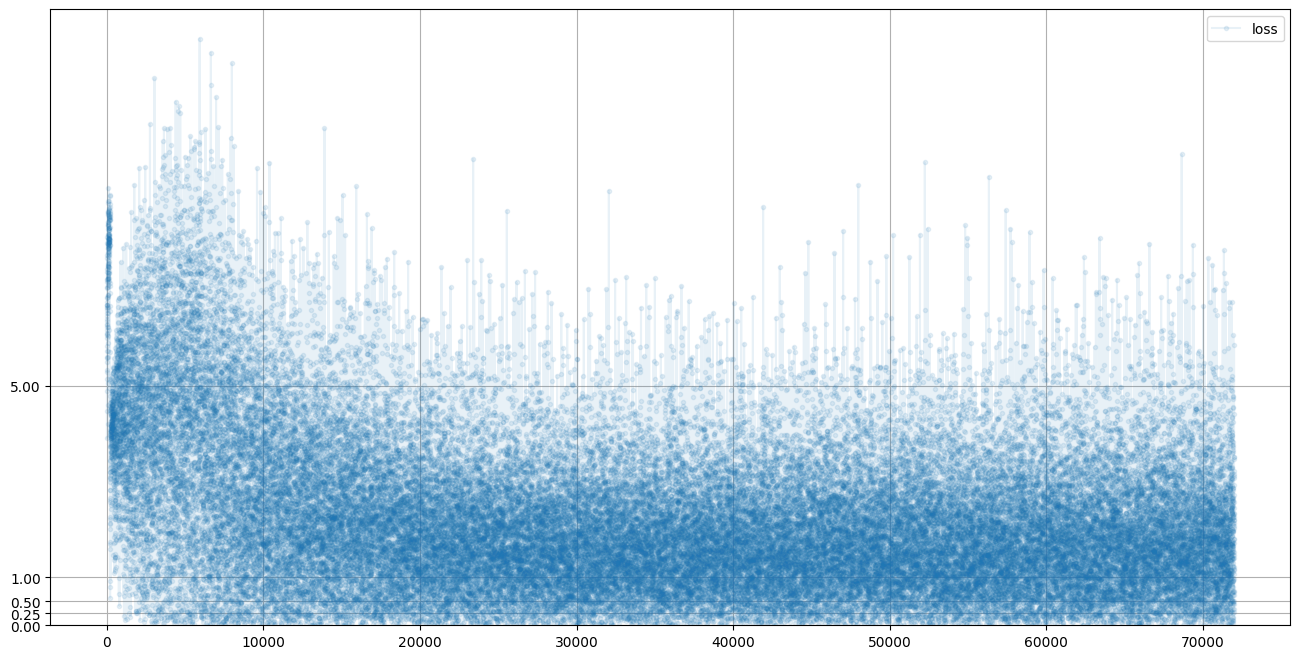

In [21]:

G.plot_progress()



## Run Generator after training

plot several outputs from the trained generator

plot a 3 column, 2 row array of generated images


In [22]:

'''

f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
  

'''


"\n\nf, axarr = plt.subplots(2,3, figsize=(16,8))\n\nfor i in range(2):\n    for j in range(3):\n        output = G.forward(generate_random_seed(100))\n        img = output.detach().numpy().reshape(28,28)\n        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')\n  \n\n"

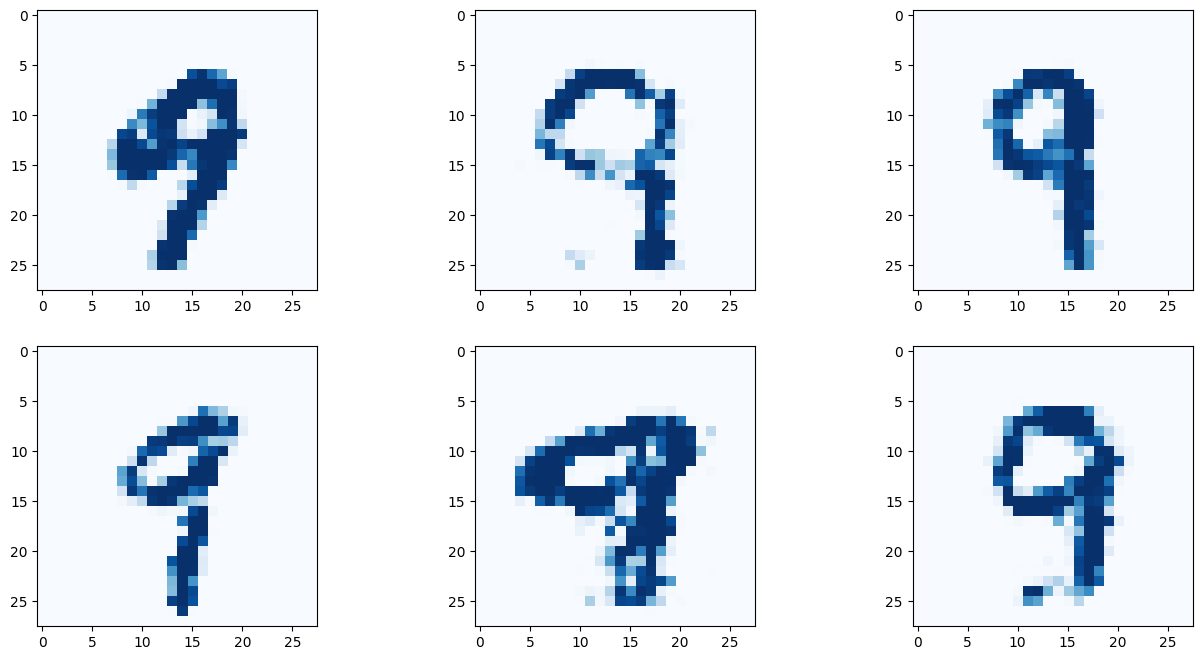

In [23]:

label = 9
        
label_tensor = torch.zeros((10))
label_tensor[label] = 1.0

        
f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100), label_tensor)
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

      

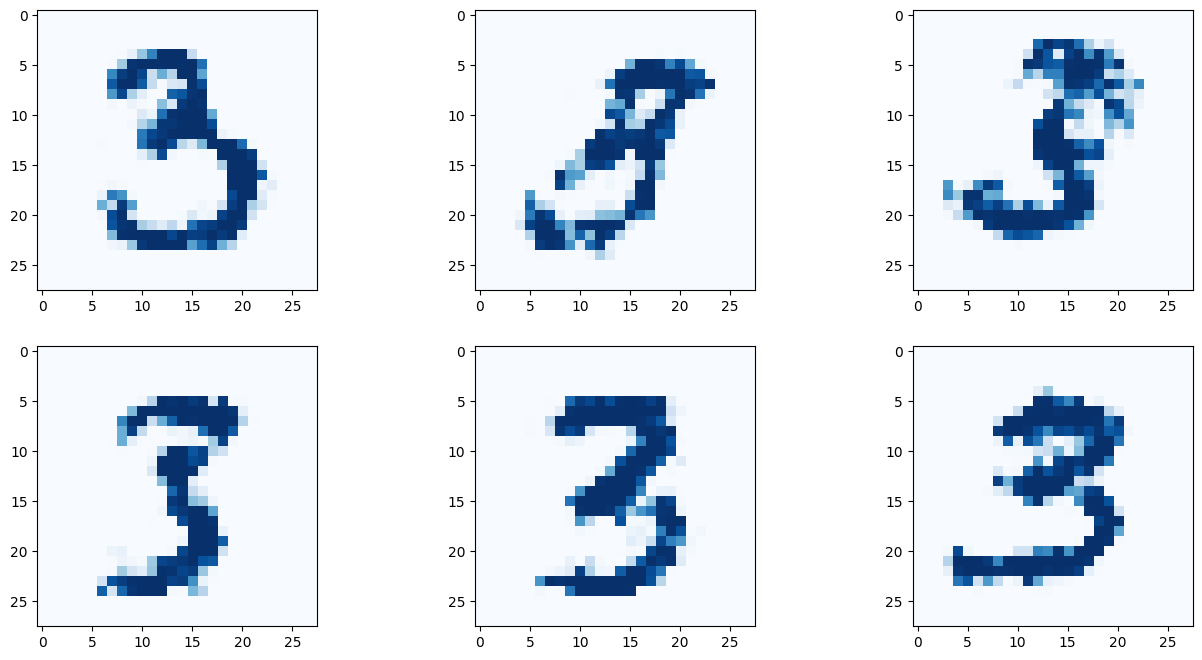

In [24]:

label = 3
        
label_tensor = torch.zeros((10))
label_tensor[label] = 1.0

        
f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100), label_tensor)
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')




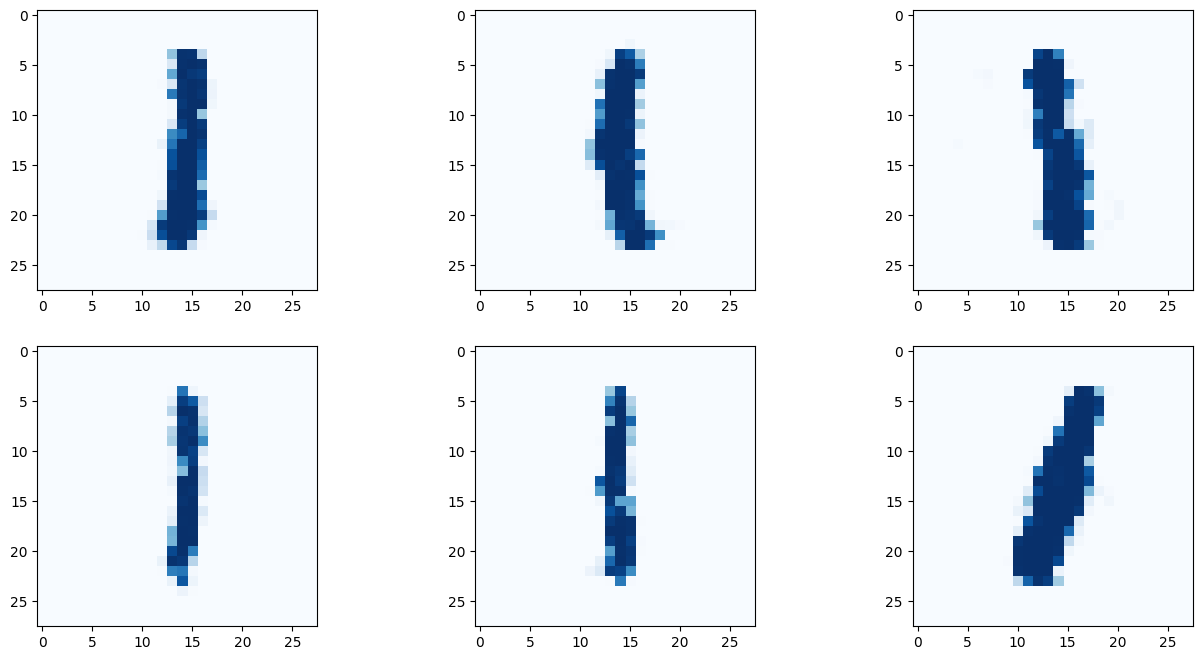

In [25]:

label = 1
        
label_tensor = torch.zeros((10))
label_tensor[label] = 1.0

        
f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100), label_tensor)
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')




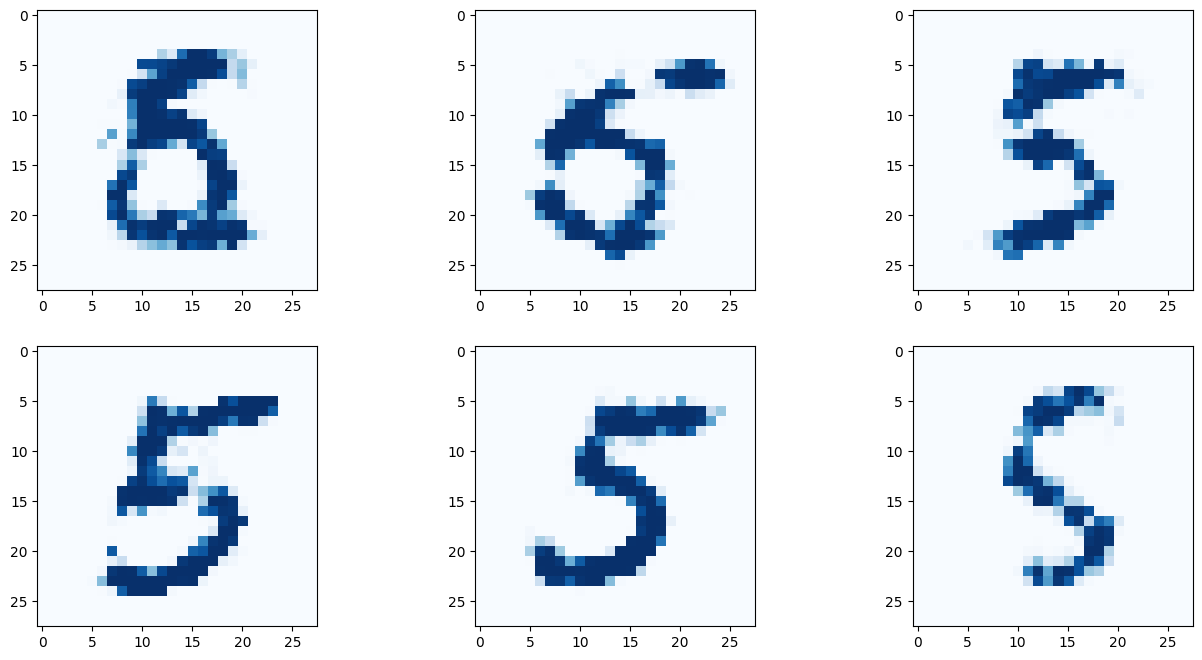

In [26]:


label = 5
        
label_tensor = torch.zeros((10))
label_tensor[label] = 1.0

        
f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100), label_tensor)
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')





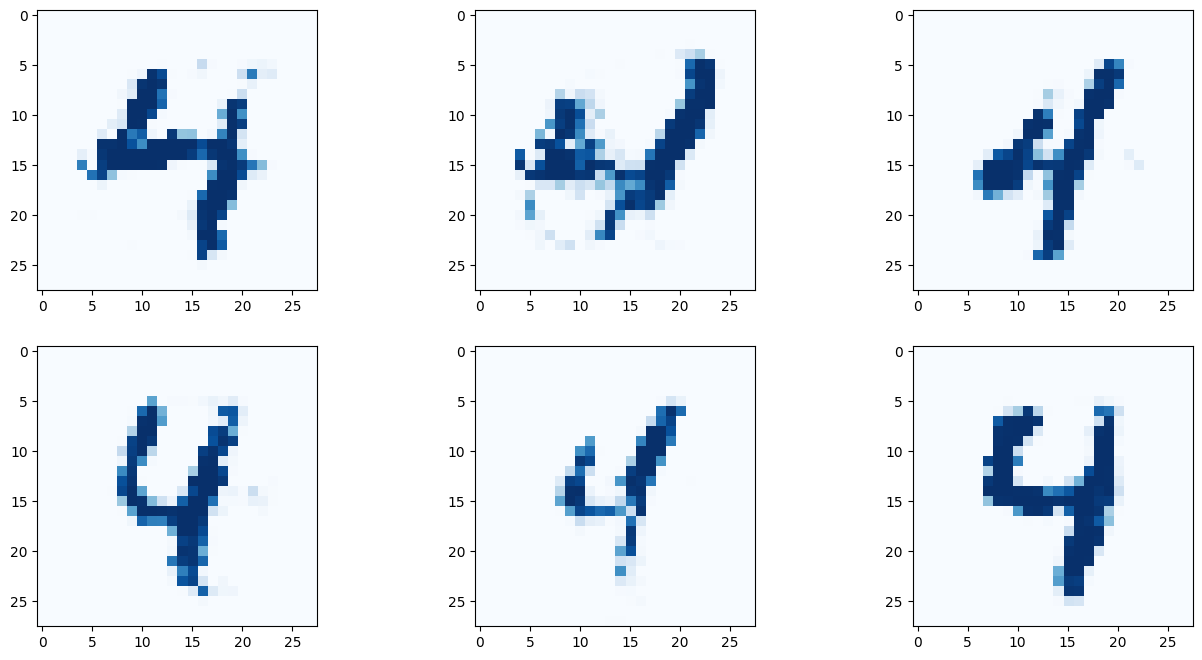

In [27]:

G.plot_images(4)
